In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def file_process(path):
    dtype_mapper={"ProductID":"int64",
                 "ProductName":"string",
                 "Category":"string",
                 "Price":"float64",
                 "Rating":"float64",
                 "NumReviews":"int64",
                 "StockQuantity":"int64",
                 "Discount":"float64",
                 "Sales":"float64",
                 "City":"string"}
    data = pd.read_csv(path, dtype=dtype_mapper)
    data["DateAdded"]=pd.to_datetime(data["DateAdded"],format="mixed")
    # data.ProductID= ProductID.ProductID.astype("int64")
    return data


In [3]:
# Load File
data = file_process("ecommerce_product_dataset.csv")


In [76]:
# Check Few Samples
data.sample(5)

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
546,547,Sparkling Wine,Wine,42.57,4.1,249,313,0.39,1452.0,2023-07-30,Chicago
569,570,Cotton Socks,Socks,192.83,4.8,2324,939,0.25,1448.0,2024-04-14,New Haven
663,664,Art Print,Posters and artwork,383.22,3.0,2462,338,0.49,287.0,2023-07-26,Concord
898,899,Brake Pads,Motor vehicle parts,186.24,3.7,1767,240,0.03,769.0,2023-10-07,Hartford
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332.0,2023-09-28,Queens


In [78]:
# Check Data Type
data.dtypes

ProductID                 int64
ProductName      string[python]
Category         string[python]
Price                   float64
Rating                  float64
NumReviews                int64
StockQuantity             int64
Discount                float64
Sales                   float64
DateAdded        datetime64[ns]
City             string[python]
dtype: object

In [92]:
data=data.assign(year=data.DateAdded.dt.year)

In [95]:
data=data.assign(month=data.DateAdded.dt.month_name())
data.sample(3)

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,year,month
326,327,Winter Coat,Coats and jackets,297.05,3.3,2757,848,0.46,562.0,2023-10-11,Hartford,2023,October
177,178,Puzzle,Toys & Games,440.77,4.8,10,61,0.31,1176.0,2023-11-26,Nashville,2023,November
232,233,Vitamin D,Vitamins and supplements,435.45,1.8,956,915,0.13,1665.0,2023-08-24,Hartford,2023,August


In [94]:
# Group by 'Category' and aggregate 'Sales' with count, sum, min, and max
data.groupby("Category")["Sales"].agg(["count","sum","min","max"])

,count,sum,min,max
Category,,,,
Art and crafting materials,40,45912.0,0.0,1995.0
Bath and body,40,42454.0,110.0,1983.0
Bedsheets,40,46631.0,55.0,1991.0
Bicycles,40,42750.0,6.0,1958.0
Blankets,40,40480.0,28.0,1969.0
Books,40,41215.0,74.0,1935.0
Candles,40,34204.0,8.0,1942.0
Clothing,40,37672.0,89.0,1853.0
Coats and jackets,40,35640.0,31.0,1959.0


In [7]:
# Group by 'Category' and aggregate 'Sales' with count, sum, min, and max
Category_sales = data.groupby("Category")["Sales"].sum()
top10=Category_sales.sort_values(ascending=False).head(10)

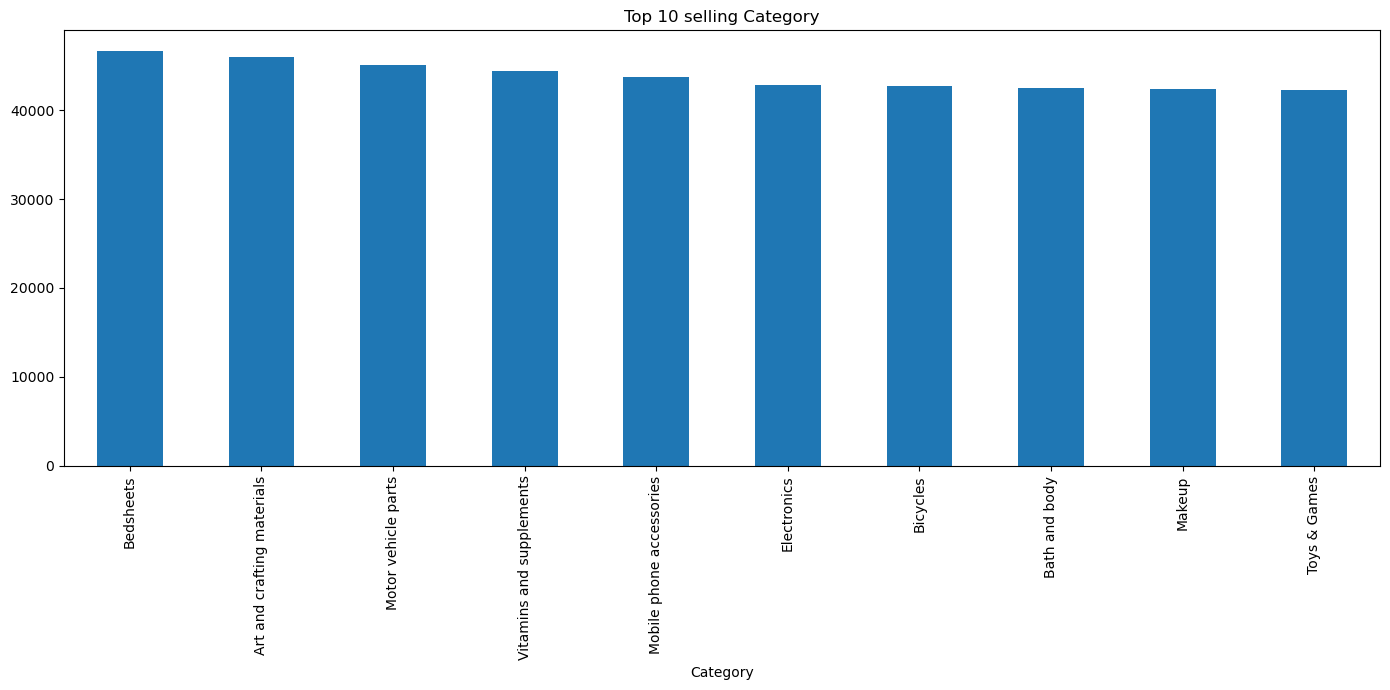

In [109]:
plt.figure(figsize=(14,7))
plt.title("Top 10 selling Category")
top10.plot(
    kind="bar",
    # color=["Blue","Green"]
)
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Sales')

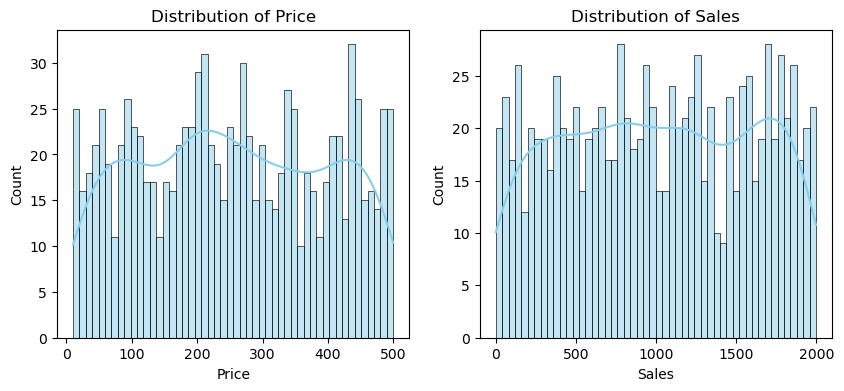

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=data.Price,
            bins=50,
            kde=True,
            color='skyblue')
plt.title('Distribution of Price')

plt.subplot(1,2,2)
sns.histplot(data=data.Sales,
            bins=50,
            kde=True,
            color='skyblue')
plt.title("Distribution of Sales")

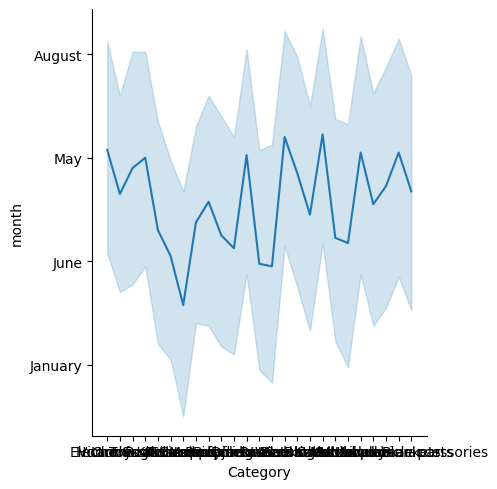

In [100]:
sns.relplot(data=data,
           kind="line",
           x= data.Category,
           y = data.month)

Text(0.5, 1.0, 'Sales as per month')

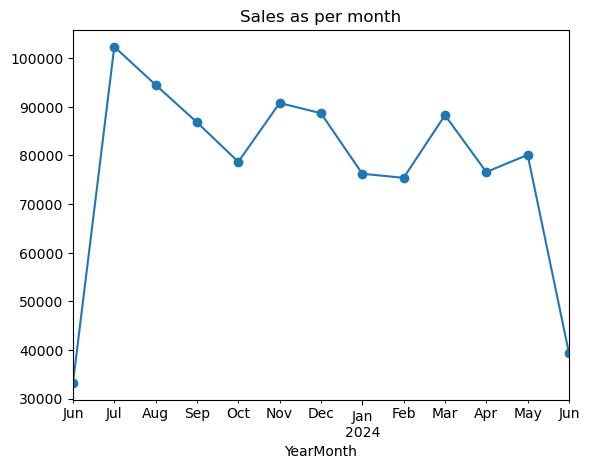

In [130]:
data['YearMonth'] = data['DateAdded'].dt.to_period('M')
data.groupby("YearMonth")["Sales"].sum().plot(marker='o')
plt.title("Sales as per month")

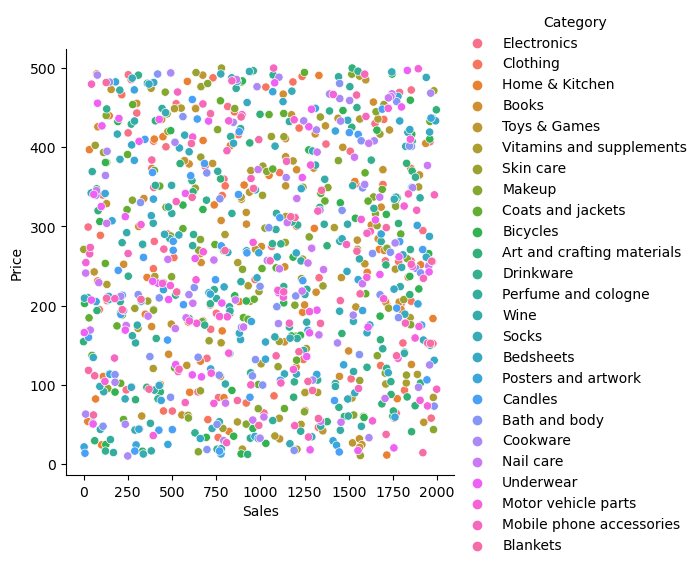

In [36]:
sns.relplot(data=data,
           kind="scatter",
           x= data.Sales,
           y=data.Price,
            hue=data.Category
           # bins=30
           )

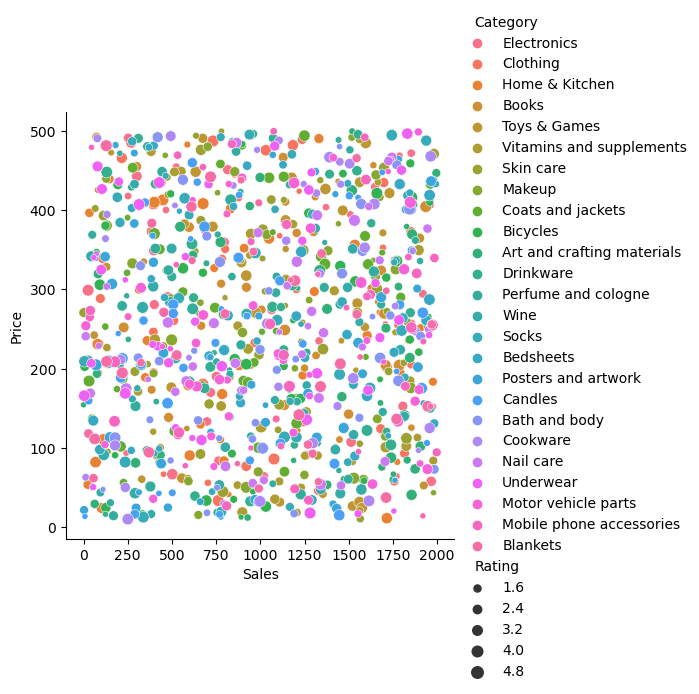

In [47]:
sns.relplot(data=data,
            kind="scatter",
            x= data.Sales,
            y=data.Price,
            hue=data.Category,
            size=data.Rating,
            # style=data.City
            # legend="full"
           )

In [132]:
top10

Category
Bedsheets                     46631.0
Art and crafting materials    45912.0
Motor vehicle parts           45116.0
Vitamins and supplements      44402.0
Mobile phone accessories      43660.0
Electronics                   42844.0
Bicycles                      42750.0
Bath and body                 42454.0
Makeup                        42337.0
Toys & Games                  42295.0
Name: Sales, dtype: float64